# Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we investigate a dataset of Brazilian medical appointments sourced from Kaggle. The independent variable is whether the patient missed the appointment, and the dependent variables involve whether an SMS was sent, the age of patients, and the presence of chronic conditions like diabetes.

**Question 1: **
Are patients who have been sent an SMS less likely to miss an appointment?

**Question 2: **
What is the patient age distribution and how is that associated with missing appointments?

**Question 3: **
Describe the presence of chronic conditions in the patient population and whether that is associated with missing appointments?

In [1]:
# import libraries such as pandas and matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# load dataframe and scan first rows
df = pd.read_csv('appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### Renaming

**Problem One: ** The name for the appointment column ends with 'ID', but for the patient column it ends with 'Id'. 

**Problem Two: ** There are spelling errors for columns, such as 'Hipertension' or 'Handcap'. 

**Problem Three: ** Some column names could be rephrased to have clearer meaning: 'scholarship' should be renamed to 'bolsa' because it is really referring to whether the patient is sponsored under the Bolsa Familia program, we could rename 'SMS_received' to 'SMS', and 'No-show' to 'Missed'.

In [2]:
# fix problem one by renaming patient
df = df.rename(columns = {'PatientId': 'PatientID'})

In [3]:
# fix problem two by correcting spelling errors
df = df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [4]:
# fix problem three by simplifying some names
df = df.rename(columns = {'Scholarship': 'Bolsa', 'SMS_received': 'SMS', 'No-show': 'Missed'})

# check that corrections have taken effect
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Missed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Duplicates
Let us check to see if there are any duplicate rows, and if so remove them.

In [5]:
sum(df.duplicated())

0

### Datatypes

Now that we know there are no duplicate rows, let us probe deeper to see if there are any incorrect data types or missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Bolsa             110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS               110527 non-null int64
Missed            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Every column has the same number of values as there are rows so there is no problem with missing values. However the 'ScheduledDay' and 'AppointmentDay' columns appear to be strings when they could more appropriately be datetimes. Furthermore, other columns representing whether the patient is a part of Bolsa Familia, and whether they have certain medical conditions are represented as integers when booleans would be better. 

In [7]:
# change string datatypes to datetimes
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# change integer datatypes to booleans
to_booleans = ['Bolsa', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS']

for c in to_booleans:
    df[c] = df[c].astype('bool')

# check corrections have taken effect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Bolsa             110527 non-null bool
Hypertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handicap          110527 non-null bool
SMS               110527 non-null bool
Missed            110527 non-null object
dtypes: bool(6), datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 7.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have assessed and cleaned our data, it is time for exploration. We will be investigating along the questions that were formulated earlier.

### Does sending SMS make patients less likely to miss appointments?

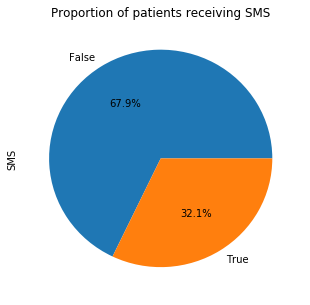

In [10]:
%matplotlib inline
df['SMS'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Proportion of patients receiving SMS', figsize=[5,5])

We know that only 32% of patients received SMS reminders, the question is whether the receipt of such a reminder made patients less likely to attend appointments. 

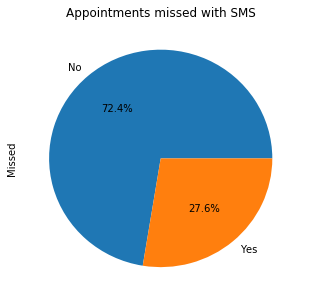

In [11]:
# split data frame into two groups
df_SMS = df.query('SMS == True')
df_NSMS = df.query('SMS == False')

# what proportion of appointments were missed by those who received SMS?
df_SMS['Missed'].value_counts().plot(kind='pie', title='Appointments missed with SMS', autopct='%1.1f%%', figsize=[5,5])

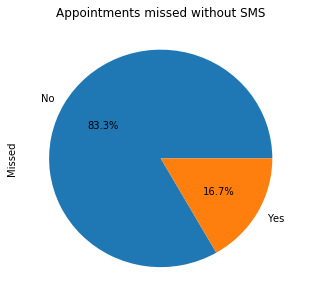

In [12]:
# what proportion of appointments were missed by those who did not receive an SMS?
df_NSMS['Missed'].value_counts().plot(kind='pie', title='Appointments missed without SMS', autopct='%1.1f%%', figsize=[5,5])

### Are older patients more likely to miss appointments?

Let us first get an idea of the age distribution in our patient population.

(array([  1.87500000e+04,   1.59270000e+04,   1.54230000e+04,
          1.74860000e+04,   1.70720000e+04,   1.57400000e+04,
          7.27700000e+03,   2.61000000e+03,   2.37000000e+02,
          5.00000000e+00]),
 array([  -1. ,   10.6,   22.2,   33.8,   45.4,   57. ,   68.6,   80.2,
          91.8,  103.4,  115. ]),
 <a list of 10 Patch objects>)

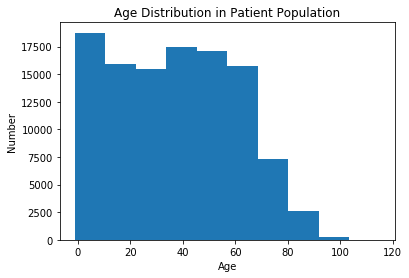

In [13]:
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Age Distribution in Patient Population')
plt.hist(df['Age'])

So the vast majority of patients are 60 or under. Let's divide our patient population into three groups: young (under 30), middle aged (between 30 and less than 60) and old (60 and over). Then we will see if there are differences in the rate at which these groups miss appointments.

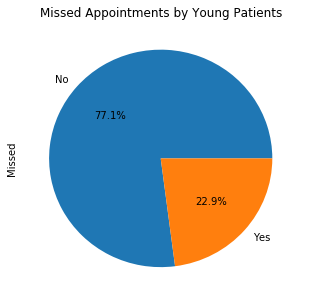

In [14]:
young = df.query('Age < 30')
middle = df.query('Age >= 30 & Age < 60')
old = df.query('Age >= 60')

young['Missed'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Missed Appointments by Young Patients')

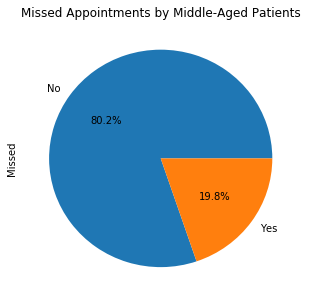

In [15]:
middle['Missed'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Missed Appointments by Middle-Aged Patients')

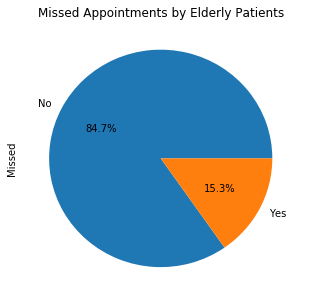

In [16]:
old['Missed'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5], title='Missed Appointments by Elderly Patients')

### Are patients with chronic conditions more likely to miss appointments?

Let us first calculate the number of patients with chronic conditions (one or more of diabetes, alcoholism, hypertension, or handicap) in the population, and what is the proportion?

In [17]:
# split dataset into two groups: patients with chronic conditions, and those without
chronic = df.query('Hypertension == True | Diabetes == True | Alcoholism == True | Handicap == True')
healthy = df.query('Hypertension == False & Diabetes == False & Alcoholism == False & Handicap == False')

# find proportion of patients with at least one chronic condition
chronic['PatientID'].count()/df['PatientID'].count()

0.23896423498330724

Now that we know almost 24% of the patient population suffer a chronic condition, we ask ourselves whether such patients are more or less likely to miss an appointment.

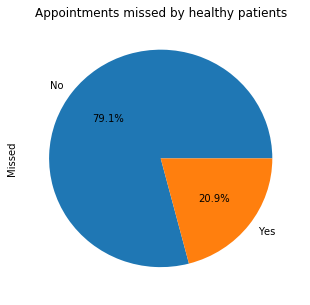

In [18]:
healthy['Missed'].value_counts().plot(kind='pie', title='Appointments missed by healthy patients', autopct='%1.1f%%', figsize=[5,5])

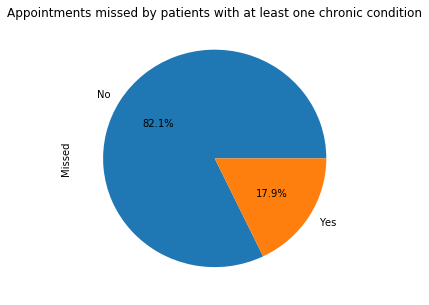

In [19]:
chronic['Missed'].value_counts().plot(kind='pie', title='Appointments missed by patients with at least one chronic condition', autopct='%1.1f%%', figsize=[5,5])

<a id='conclusions'></a>
## Conclusions

Our exploration has generated the statistics and graphs allowing us to fulfill the purposes of our investigation. We can see how certain social and medical factors affect the likelihood of patients missing their appointments. Some findings were expected, others were surprising and carry practical implications.

### Did SMS reminders lower missed appointments?
Only around 32% of patients received an SMS reminder, and to our surprise those who did receive it were more likely to miss an appointment (27.6%) than those who didn’t (16.7%). Perhaps we should consider no longer sending SMS reminders.

### How does age impact on keeping appointments?

Though the vast majority of patients are young (under 30) or middle-aged (between 30 and 60), young people were most likely to miss appointments (22.9%), elderly people over 60 were least likely to miss appointments (15.3%), and middle-aged people were in between (19.8%). The data suggests that the older people get, the more diligent they are about keeping doctor’s appointments.

### Do chronic conditions cause patients to keep appointments?

Around 24% of the patient population suffered a chronic condition (diabetes, alcoholism, hypertension, or handicap), and those who did have a chronic condition were slightly less likely to miss appointments (17.9%) than healthier persons (20.9%).

### Going forward

**Hidden Variables**

Though we have found important correlations in our data, this does not mean that one variable causes another. There may be a hidden variable that we don't know about influencing the relationship. For example, we found receiving an SMS actually increased the number of missed appointments, but it could be that SMS reminders were being sent to people most likely to miss appointments in the first place. These considerations hold true for other variables, age itself may not decrease likelihood of missing appointment, it may be that older people live closer to clinics. 


**Other investigative paths**

Consider the gap between appointment times, does  a larger gap increase missed appointments?

Consider gender. What is the gender distribution in the patient population and does being of a certain gender increase the chances of missing an appointment?

We need more information on 'Bolsa Familia', how does that specifically impact patients? The medical component of the social program seems to be about sending children to medical care. Is there a specific subset population of young children on Bolsa Familia?

There are also so many neighbourhoods, close to one hundred, that we cannot reliably represent that on a graph. Perhaps we should divide the neighbourhoods into broader regions, and then conduct our analysis. Or we might drop the column altogether.